# Week 11: Solultion to Shortest Paths and Shortest Tour

<font color='blue'><b>Goals of this notebook:</b></font> Learn how to compute the shortest path between two vertices in a graph and how to find the shortest tour visiting all vertices of a graph.

Imagine you and your friends have decided to go on a road trip across Europe and visit the capitals of Germany, Switzerland, Belgium, Romania, and Hungary. The following table shows the travel time by car between the capitals.

<table class="center">
    <tr>
        <th style="text-align:center">Origin </th>
        <th style="text-align:center">Destination </th>
        <th style="text-align:center">Travel time (hh:mm) </th>
    </tr>
    <tr>
        <td style="text-align:center">Berlin</td>
        <td style="text-align:center">Bern</td>
        <td style="text-align:center">09:44</td>
    </tr>
    <tr>
        <td style="text-align:center">Berlin</td>
        <td style="text-align:center">Brussels</td>
        <td style="text-align:center">07:51</td>
    </tr>
    <tr>
        <td style="text-align:center">Berlin</td>
        <td style="text-align:center">Bucharest</td>
        <td style="text-align:center">18:00</td>
    </tr>
    <tr>
        <td style="text-align:center">Berlin</td>
        <td style="text-align:center">Budapest</td>
        <td style="text-align:center">08:51</td>
    </tr>
    <tr>
        <td style="text-align:center">Bern</td>
        <td style="text-align:center">Brussels</td>
        <td style="text-align:center">06:45</td>
    </tr>
    <tr>
        <td style="text-align:center">Bern</td>
        <td style="text-align:center">Budapest</td>
        <td style="text-align:center">11:21</td>
    </tr>
    <tr>
        <td style="text-align:center">Brussels</td>
        <td style="text-align:center">Budapest</td>
        <td style="text-align:center">13:46</td>
    </tr>
    <tr>
        <td style="text-align:center">Bucharest</td>
        <td style="text-align:center">Budapest</td>
        <td style="text-align:center">09:22</td>
    </tr>
</table>

## Task 1: Drawing the Graph

**Your task:** Draw the resulting graph with the cities as nodes and the travel times as edge weights. All the commands you need can be found in last week's "Introduction to networkx" notebook.

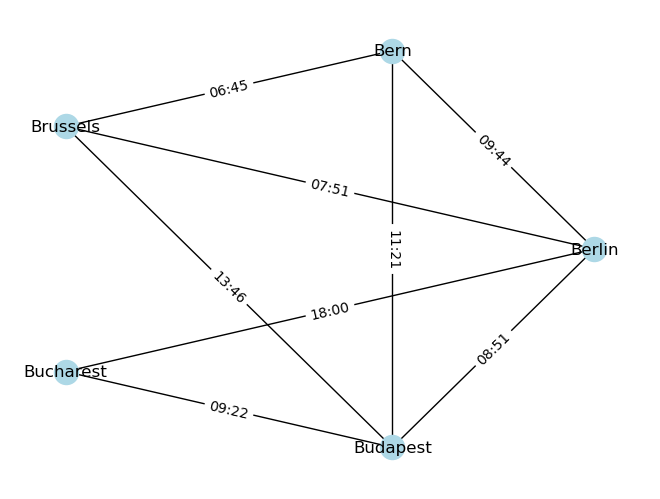

In [1]:
# Load networkx
import networkx as nx

# Command to draw in jupyter notebook
%matplotlib inline

# Create an empty graph
G = nx.Graph()

# Add the nodes
G.add_nodes_from([("Berlin"),
                  ("Bern"),
                  ("Brussels"),
                  ("Bucharest"),
                  ("Budapest")])

# Add the edges
G.add_edges_from([("Berlin", "Bern", {"travel_time": "09:44"}),
                  ("Berlin", "Brussels", {"travel_time": "07:51"}),
                  ("Berlin", "Bucharest", {"travel_time": "18:00"}),
                  ("Berlin", "Budapest", {"travel_time": "08:51"}),
                  ("Bern", "Brussels", {"travel_time": "06:45"}),
                  ("Bern", "Budapest", {"travel_time": "11:21"}),
                  ("Brussels", "Budapest", {"travel_time": "13:46"}),
                  ("Bucharest", "Budapest", {"travel_time": "09:22"})])

# Draw the weighted graph
node_pos = nx.circular_layout(G) # brings the nodes in a circle, which makes it easier to read
nx.draw(G, with_labels=True, pos=node_pos, node_color='lightblue')
edge_draw = nx.draw_networkx_edge_labels(G, pos=node_pos, 
                                         edge_labels=nx.get_edge_attributes(G,'travel_time'))


## Taks 2: Computing the Shortest Path

**Your task:** For each pair of the capitals, compute the length of the shortest path between them, i.e., the route from one capital to another with the smallest travel time.

**Optional task**: In addition to computing the shortest path length, print out the shortest path.

*Hint 1: In the last step, you might have created a graph with travel_time as edges attributes. If the attributes are strings (e.g. `09:44`), you might want to covert them to numbers to compute the sum of travel times. For example, you can convert `09:44` to $9\times 60+44=584$ minutes, and use 584 as your new attribute for the edge between Berlin and Bern.*

*Hint 2: The module `networkx` comes with many useful functions. In particular, given a weighted graph, we can directly ask `networkx` to compute the shortest path between two vertices. More specifically, the code
`shortest_path(G[, source, target, weight])` 
computes the shortest weighted path in G from the source vertex to the target vertex. You can look into the reference page https://networkx.org/documentation/stable/reference/index.html for more details.*

In [2]:
# First we convert our travel time into numbers
for edge in G.edges():
    string = (G[edge[0]][edge[1]]["travel_time"]).split(":")
    t = (60*int(string[0]) + int(string[1]))
    G.add_edge(edge[0], edge[1], time=t)

# Then we create an iterable list of our nodes
nodes = list(G.nodes())

# Lastly, we compute the shortest path between all pairs
for i in range(len(nodes)):
    for j in range(i+1,len(nodes)):
        
        # Compute the shortes time using the function shortest_path_length and set 'time' as edge weights
        t = nx.shortest_path_length(G, source=nodes[i], target=nodes[j], weight='time')
        
        # The function shortest_path gives us the a list of our stops (nodes) from source to target
        path = nx.shortest_path(G, source=nodes[i], target=nodes[j], weight='time')
        
        # Print our solution
        print('It takes {}h{}m to get from {} to {}.'.format(int(t/60), t%60, nodes[i], nodes[j]))
        
        stops = 'Your path is: '
        for k in range(0,len(path)):
            stops += '{}-> '.format(path[k])
        print(stops[:-3] + '. \n')
        

It takes 9h44m to get from Berlin to Bern.
Your path is: Berlin-> Bern. 

It takes 7h51m to get from Berlin to Brussels.
Your path is: Berlin-> Brussels. 

It takes 18h0m to get from Berlin to Bucharest.
Your path is: Berlin-> Bucharest. 

It takes 8h51m to get from Berlin to Budapest.
Your path is: Berlin-> Budapest. 

It takes 6h45m to get from Bern to Brussels.
Your path is: Bern-> Brussels. 

It takes 20h43m to get from Bern to Bucharest.
Your path is: Bern-> Budapest-> Bucharest. 

It takes 11h21m to get from Bern to Budapest.
Your path is: Bern-> Budapest. 

It takes 23h8m to get from Brussels to Bucharest.
Your path is: Brussels-> Budapest-> Bucharest. 

It takes 13h46m to get from Brussels to Budapest.
Your path is: Brussels-> Budapest. 

It takes 9h22m to get from Bucharest to Budapest.
Your path is: Bucharest-> Budapest. 



## Task 3: Computing the Shortest Tour

**Your task:** Find the shortest Hamiltonian cycle, i.e., a cycle that starts and ends at the same capital and visits every capital exactly once. What is the complexity of your algorithm (given an $n$-vertex graph)?

*Hint: The problem of finding a shortest Hamiltonian cycle is known as the [travelling salesman problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem). It is NP-hard, so it is unlikely that we can find a fast algorithm to solve this problem. Therefore, we can simply solve this problem using 'brute force'. Let's try to answer this question: how can we describe all sequences of vertices that can potentially form a Hamiltonian cycle?*

*The idea is to consider all permutations of vertices. Then, for every permutation that forms a cycle, compare its length to the shortest cycle we have seen so far and update the best solution accordingly. The complexity of this algorithm is $O(n \cdot n!)$.*

In [3]:
# Use itertools to make an iterable for all permutations of our 5 cities
import itertools

# As we want to minimize, we initialize with a large number
time = 9223372036854775807

# We make our nodes an iterable object for easy permutation
iterable = iter(nodes)

# We will store our final solution as a list of cities (nodes) in here
path = 0

# We check if all edges in our permutation exists
def checkIfAllEdgesExist(pathway):
    for j in range(len(pathway)):     
        # If two nodes aren't directly connected in our path, we will reject the permutation, as we would 
        # otherwise visit one (or more) city [except start/finish] more than once, which is not desirable
        if (not G.has_edge(pathway[j], pathway[(j+1)%5])):
            return False        
    return True

# We will go through all permutations of our cities
for perm in itertools.permutations(iterable):
    
    # We want to make sure that we only visit each city once, more on that in the function above
    if checkIfAllEdgesExist(perm):
        
        # we calculate the time it takes to travel with our current permutation. 
        # To do so, we add all weight (time) of the edges we go through.
        t_curr = 0
        for i in range(len(perm)):
            t_curr += G.get_edge_data(perm[i], perm[(i+1)%5])['time']
            
        # If it is faster to use our current permutation that it was to use all the other permutations before,
        # we update our current fastest time and our best path
        if t_curr < time:
            path = perm
            time = t_curr

# Print our solution 
print('The shortest tour through all cities is starting and ending in',
      '{} and going via the following cities: \n{}, {}, {} and {}'
      .format(path[0], path[1], path[2], path[3], path[4]))
print('It will take you {} hours {} minutes of non-stop driving.'.format(int(time/60), time%60))


The shortest tour through all cities is starting and ending in Berlin and going via the following cities: 
Brussels, Bern, Budapest and Bucharest
It will take you 53 hours 19 minutes of non-stop driving.


Congratulations! You have finished all tasks for computing shortest path and cycles this week. Below are some more tools in `networkx` that could be useful.

## Appendix: More Advanced Tools


### Example 1: Another way of checking the existence of an edge

Another way to check if an edge exists is to check if one node contains another node in its <i>adjacency list</i>.
The adjacencies of `G` can be accessed using `G.adj`.
The specific neighbors of a node can be accessed using the command `G.adj[v]`, where `v` is the node whose neighbors we want. For example, the following piece of code returns all the neighbors of Berlin: `G.adj['Berlin']`.

In [4]:
G.adj['Berlin']

AtlasView({'Bern': {'travel_time': '09:44', 'time': 584}, 'Brussels': {'travel_time': '07:51', 'time': 471}, 'Bucharest': {'travel_time': '18:00', 'time': 1080}, 'Budapest': {'travel_time': '08:51', 'time': 531}})

### Example 2: Induced subgraphs

Let $G=(V,E)$ be a graph with vertex set $V$ and edge set $E$. Let $U\subset V$ be a subset of vertices, then the induced subgraph $G[U]$ is a subgraph of $G$ with vertex set $U$, and all edges with both endpoints in $U$. An induced subgraph of `G` contains the relationships for a certain subset of the nodes. 

Given a set `U` of nodes of `G`, we can use the command `H = G.subgraph(U)` to create the subgraph induced by `U`. For example, the following piece of code shows the induced subgraph with vertices Berlin, Bern and Brussels.

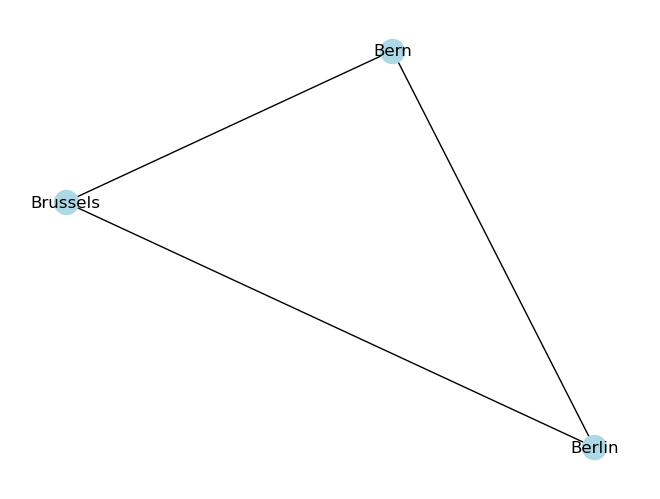

In [5]:
# Create H using these nodes
U = ["Bern", "Berlin", "Brussels"]
H = G.subgraph(U)

# Draw H
nx.draw(H, with_labels=True, pos=node_pos, node_color='lightblue')

### Example 3: Breadth first search

`networkx` also comes with the BFS algorithm. Suppose that we want to run the BFS algorithm on `G` using `Bern` as a root. One method to run BFS is using the command 

```
edges_from_BFS = list(nx.bfs_edges(G, 'Bern'))
```

The command above runs `nx.bfs_edges(G, 'Bern')` and returns the edges found by the BFS algorithm in the order that the BFS algorithm found them.

*Note: The command `nx.bfs_edges(G, 'Bern')` returns a data structure called a generator. You do not need to know what it is. We use `list()` to transform it into a list, which we are familiar with.*

Run the following code to run BFS on `G` starting at `Bern`. We print the edges and nodes in the order they are visited.

In [6]:
# Run BFS on G with root Bern
edges_from_BFS = list(nx.bfs_edges(G, 'Bern'))

# Print the edges from the BFS algorithm
print(f'Here are the edges that BFS finds if we start at Bern: {edges_from_BFS}.')

# Print the nodes from the BFS algorithm
nodes_from_BFS = ['Bern'] + [v for u, v in edges_from_BFS]
print(f'Here are the nodes that BFS finds if we start at Bern: {nodes_from_BFS}.')

Here are the edges that BFS finds if we start at Bern: [('Bern', 'Berlin'), ('Bern', 'Brussels'), ('Bern', 'Budapest'), ('Berlin', 'Bucharest')].
Here are the nodes that BFS finds if we start at Bern: ['Bern', 'Berlin', 'Brussels', 'Budapest', 'Bucharest'].


Finally, we can draw `G` with only the edges visited by `BFS`. 

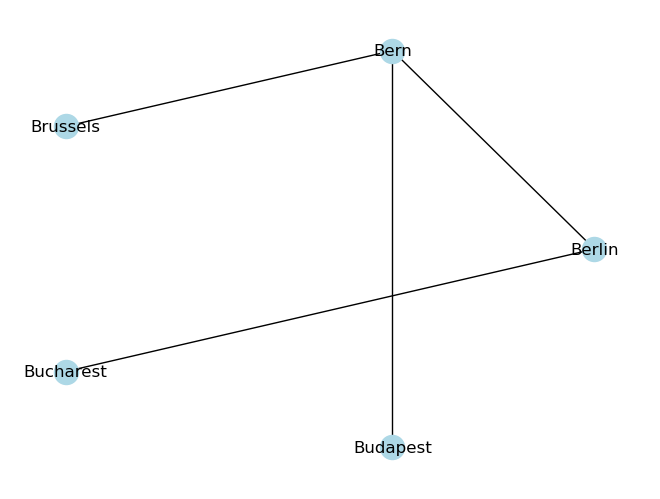

In [7]:
# Draw G with the edges of M
nx.draw(G, pos=node_pos , edgelist=edges_from_BFS, 
        with_labels=True, node_color='lightblue')